Voor je de dataset samenstelt moet de keuze tussen de verschillende vormen van computer vision al zijn gedaan. Met als keuzes: Classification, Detection en Segmentation. Als het niet duidelijk is welk type model je wilt maken ga door naar het kopje 'Model Trainen' -> 'Model keuze'.

    'Model Trainen' -> 'Model keuze' -staat nog niet in de github repo

In [2]:
from IPython.display import FileLink, FileLinks

# Data Verwerken

### Gewenste Folder Structuur

Afhankelijk van het type model dat je gaat trainen zijn er verschillende soorten aanbevolen structuren. 
Zorg dat je data op deze manier gestructuurd staat in het geval je gebruik wil maken van libraries (Extreem aan te raden). 

#### Image Classification

Bij image classification wil je de de afbeeldingen verdeeld per class name:

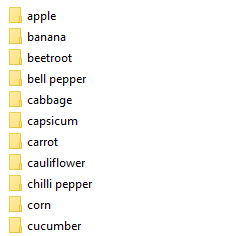

Je zou al de afbeeldingen kunnen verdelen over een test, train en validatie set.

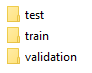

Doe dit op het moment dat je een specifiek idee hebt waar je welke afbeeldingen wilt hebben, zo niet doe het verdelen met code (de aanbevolen methode).

#### Object Detection

Bij Image Detection wil je alle afbeeldingen in de zelfde map hebben. 

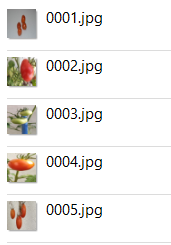

Daarnaast wil je een tweede folder met alle label files. 

De namen van de afbeelding en het label moeten het zelfde zijn zodat de code het herkent als paar. Deze twee folders kunnen ook weer over test, train en validatie worden gesplitst. Let hierbij wel op dat de paren in dit proces niet worden gesplitst.

__Splitsen in training, validatie, en testsets__: Dit doen we met een verdeling zoals 70-15-15, waarbij elke set representatief is voor de variatie in de dataset. Deze splitsing moet willekeurig maar evenwichtig per klasse zijn.

## Data Augmentatie

Voor het model getraind gaat worden doen we nog aanpassingen aan de dataset. Dit doen we om: de dataset bruikbaar te maken, het model robuster, klasse balans recht te trekken al met al de dataset te optimaliseren voor het gebruik. 

#### Normaliseren

Normaliseren is de schaalveranderingen van de invoerdata zodat het binnen een bepaalde range valt, meestal tussen 0 en 1, of een standaard normaalverdeling met een gemiddelde van 0 en een standaarddeviatie van 1.

__Waarom normaliseren?__
1. **Consistente Schaal:** Verschillende features kunnen sterk uiteenlopende schalen hebben. Normaliseren brengt ze op een vergelijkbare schaal, waardoor algoritmen zoals SGD beter kunnen werken omdat ze minder tijd verliezen met het omgaan met grote, ongelijke stappen in verschillende richtingen.

2. **Snellere Convergentie:** Door data te normaliseren kan het optimalisatieproces sneller en effectiever verlopen, omdat de cost function uitkomsten/resultaten meestal beter behandeld kunnen worden met genormaliseerde data.

3. **Voorkomen van Dominantie door Groot-schaalfactoren:** Features met grote waardes kunnen bijdragen aan een onevenredig grote [gradiënt](https://builtin.com/data-science/gradient-descent), wat kan leiden tot instabiliteit in het model. Normalisatie beperkt dit effect.
Pas normalisatie toe om de pixelwaardes naar een vergelijkbaar bereik te brengen, dit doen we gestandaardiseerd met het gemiddelde en standaardafwijking van de dataset.


__Impact van Normalisatie:__

- **Verbeterde Modelprestaties:** Vooral bij modellen die afhankelijk zijn van gradiënt-gebaseerde optimalisatie, zoals neurale netwerken, kan normalisatie leiden tot snellere convergentie en betere prestaties.
  
- **Verhoogde Stabiliteit:** Het helpt om numerieke instabiliteit te verminderen en voorkomt dat algoritmen worstelen met hoge waarden of afwijkende waarden.

- **Betere Generalisatie:** Door ervoor te zorgen dat alle features een gelijke footing hebben, kan normalisatie helpen een betere generalisatie van modellen te behalen op ongeziene data door overfitting te verminderen.

#### Uniforme afbeeldingsgrootte

Het model verwacht altijd een zelfde input grootte anders is het niet mogelijk om te leren. Omdat de afbeeldingen vaak variëren in grootte, transformeren weze naar een uniforme grootte. (bijvoorbeeld 224x224 pixels, wat standaard is voor veel CNN's zoals ResNet of EfficientNet [verdere uitleg over 224x224](https://www.quora.com/Why-many-deep-learning-models-take-224x224-images-as-input)). Hiervoor gebruiken we een methode zoals cropping, resize (met of zonder padding) of een adaptive pooling laag. De afbeeldingsgrootte is van belangaangezien als deze te klein is het details verliest waardoor het resultaat slechter is, een te hoge afbeeldingsgrootte zorgd voor een langere traintijd (en het upscalen van de afbeeldingen is ook af te raden door gebrek aan detail).

Als je gebruik wilt maken van een pre-trained model is de bijhoorende uniforme grootte verplicht. Elke pixel achter elkaar gezet wordt gezien als de input layer. Deze kunnen we dus niet aanpassen aangezien het getrainde model alleen deze grootte kent.

### Correcte klasse verdeling

Om overfitting te voorkomen is het van belang een gelijke klasse verdeling te hebben. Hieronder is een eenvoudige methode om over- of undersampling toe te voegen.

In [18]:
FileLink("..\\code\\over-under sampling.ipynb")

E:\Studie\Stage\Computer-Vision-Showcase-SUPERP\code\over-under sampling.ipynb

#### Extra Augmentatie methodes

- __Random cropping__: De afbeelding inzoomen zodat een deel van het object vervalt.
- __Random Erasing__: In de afbeelding een stuk overlappen zodat niet het hele object meer zichtbaar is.
- __Rotaties__: De afbeelding draaien om verschillende hoeken van het object te simuleren.
- __Lichtvariaties__: pas helderheid, contrast en kleurveranderingen toe om te trainen op verschillende lichtomstandigheden.
- __Shearing en schalen__: Door geometrische vervorming toe te voegen kunnen we de robuustheid vergroten.
- __Flippen en spiegelen__: zorgt voor variatie in oriëntatie.
- __Occlusie simulatie__: soms zijn objecten gedeeltelijk bedekt. Gebruik augmentaties zoals **Cutout of Gaussian blur**(*verder onderzoeken*) om dit soort scenario’s te simuleren.

Deze stappen hoef je gelukkig niet allemaal zelf uit te voeren.

#### Dataloader / Transformer

Het is aanbevolen om gebruik te maken van Dataloaders en Transformers. Hierdoor ben je in het algemeen wel verplicht de bijhorende libraries te gebruiken van de loader. Dit is een kleine opgave aangezien dataloaders het inladen van de data automatisch doet met de juiste structuur (van hier boven). Waarbij de Transformer de meegegeven data augmentatie stappen toepast.

Voorbeeld van hoe zo'n Transformer er uit ziet.
```
# Datatransformaties
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
```
Voor meer informatie over welke methodes toe te passen lees de [transform docs](https://pytorch.org/vision/stable/transforms.html) of Google de taak die je zoekt. *(Kijk eventueel verder bij de happyflow uitvoering hoe de transform is gebruikt voor data augmentation.)*

In [22]:
# Handmatig afbeeldingen aanpassen
FileLink('..\\code\\Image Processing.ipynb')

E:\Studie\Stage\Computer-Vision-Showcase-SUPERP\code\Image Processing.ipynb

In [26]:
# FileLink('Dataset Samenstellen\\PyTorch Data Loading - Vegetable Image Dataset.ipynb') # Mogelijk nog toevoegen

E:\Studie\Stage\Computer-Vision-Showcase-SUPERP\informatie\Dataset Samenstellen\PyTorch Data Loading - Vegetable Image Dataset.ipynb